# Data Challenge for Yammer dataset

## 1. Introduction
Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. On september 2, 2014, the latest activity on the user engagement dashboards showed an obvious drop. Yammer defines engagement as having made some type of server call by interacting with the product. Here in this notebook, I will analyze the data from Yammer to determin what caused the dip and provide recommending solutions for the problem.

## 2. Hypothesis
There are multiple possible reasons which can cause a decreasement on engaged users. In this notebook, I will test the following hypotheses.
### 2.1 Holiday
Yammer is a social tools for coworkers, which means it will show a decreasement when coworkers are holiday off. When testing this hypothesis, I found that the majority of users in the dataset comes from United State. There are no National Holiday at August. So it may not be caused by holidays. Besides this, user decreasement also shows on other countries, which also further support the statement because holidays are usually localized (except Christmas or New Year).
### 2.2 Service Outage
Service outage can cover a lot of topics. For example, you can have a local server down then you can find a localized user decreasement. Or, you can have part of your service down, like registration, then you will have a user decreasement in new users. When testing this hypothesis, I checked the distribution of daily users and also the distribution of locations. It looks like the service outage is not the main reason.
### 2.3 Feature failure
Feature failure is sometimes treated as a kind of service outage. But it may only affect a fraction of users. Here I test this hypothesis on the feature of device platforms. IOS and Android usually have their own updates frequently. These updates may cause a compatible problems in mobile devices. The same failure may also show on computers due to website certificates or internet traffic. Here I found that the Lenovo Thinkpad and old iPhones showed obvious user decreasement.

## 3 Other dataset (emails)
Since I already figured out that users of old iPhones and Lenovo Thinkpad may have problems to use this product. It is time to find out the reason why they have troubles. Although they didn't interact with the product, I can still get some more information through their actions on weekly sent emails since this part of data is collected independtly. In this part of analysis, I found that the users have no trouble to open the emails but some of them didn't click though the emails.

## 4 Recommendations
The possible reason for the drop of user engagement may be caused by old ios devices and some type of laptops. And an obvious low click-through rate of weekly sent emails are found in seperate source. So I will recommend the tech group to check if there is any problems of the weekly sent emails since August 04, 2014. The problems can be a compatible problems due to ios updates, the change of UI in emails, bad links or anything stopped users from clicking the emails on old iphones.

## Loading events data
This table includes one row per event, where an event is an action that a user has taken on Yammer. There are two main event types inside of it, engagement and signup. I will show the dip of engagement users mentioned in the introduction part.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

In [2]:
# read events table in pandas dataframe
events = pd.read_csv("./data/yammer_events.csv")
events.head(5)

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [3]:
events.dtypes

user_id        float64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object

In [6]:
# change the time into date
events['date'] = pd.DatetimeIndex(pd.to_datetime(events['occurred_at'])).date
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02


Since I will calculate the weekly engagement user numbers, I only load the data of 2014 in this part to avoid the duplicated week index with data of 2013.

In [7]:
# Get data for 2014
startdate = pd.to_datetime("2014-01-01").date()
enddate = pd.to_datetime("2015-01-01").date()
mask = (events['date'] >= startdate) & (events['date'] < enddate)
events_2014 = events.loc[mask].copy()
events_2014.head()

In [9]:
events_2014['weeks'] = pd.DatetimeIndex(pd.to_datetime(events_2014['date'])).week

In [11]:
# Count weekly unique engagement users 
events_2014_weekly = events_2014[['weeks','user_id','event_type']].copy()
events_2014_weekly = events_2014_weekly.groupby(['weeks','event_type'])['user_id'].nunique().reset_index(name="number of users")
events_2014_weekly.head()

,weeks,event_type,number of users
0,18,engagement,701
1,18,signup_flow,171
2,19,engagement,1054
3,19,signup_flow,350
4,20,engagement,1094


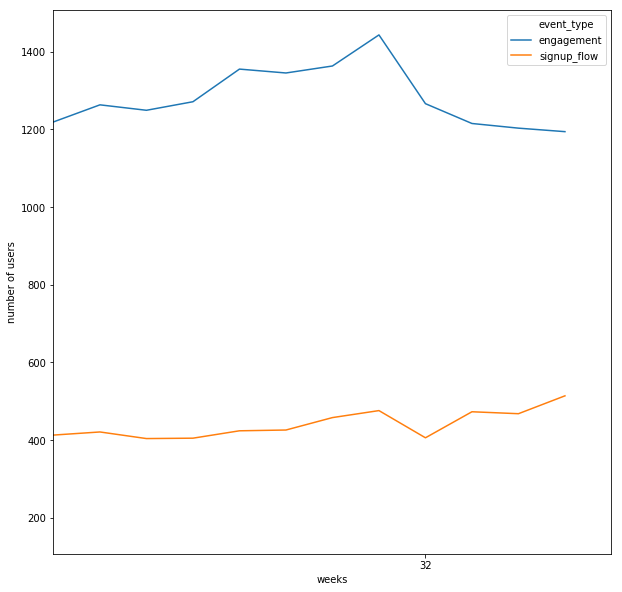

In [17]:
# plot the weekly engagement user numbers
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=events_2014_weekly, x='weeks', y='number of users', hue='event_type', ax=ax)
ax.set_xlim(24,36)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.legend(loc=1)

From this plot, we can find that there is an obvious dip in the engagment users. And it seems unrelated with new signon users because the number of signon users is back to the original level in one week.

Let's check some details in daily numbers

In [18]:
events_daily = events[['date','user_id','event_type']].copy()
events_daily.head()

,date,user_id,event_type
0,2014-05-02,10522.0,engagement
1,2014-05-02,10522.0,engagement
2,2014-05-02,10522.0,engagement
3,2014-05-02,10522.0,engagement
4,2014-05-02,10522.0,engagement


In [19]:
events_daily = events_daily.groupby(['date','event_type'])['user_id'].nunique().reset_index(name="number of users")
events_daily.head()

,date,event_type,number of users
0,2014-05-01,engagement,293
1,2014-05-01,signup_flow,73
2,2014-05-02,engagement,358
3,2014-05-02,signup_flow,57
4,2014-05-03,engagement,145


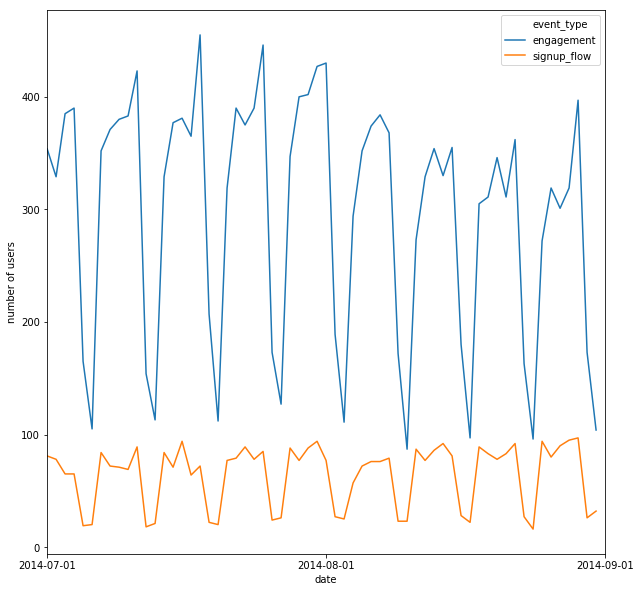

In [20]:
# plot the daily engagement user numbers
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=events_daily, x='date', y='number of users', hue='event_type', ax=ax)
ax.set_xlim(pd.Timestamp('2014-07-01'), pd.Timestamp('2014-09-01'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.legend(loc=1)

From the daily numbers, we can see a clearly a weekly virations in the user numbers. High interactions in weekdays and low interaction in weekends, which makes sense. And the decreasement mainly appears in the engagement users.

We can double check that with users table to see if we get normal growth on new users.

In [21]:
# read users table in pandas dataframe
users = pd.read_csv("./data/yammer_users.csv")
users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [22]:
users.dtypes

user_id         float64
created_at       object
company_id      float64
language         object
activated_at     object
state            object
dtype: object

In [23]:
users['date'] = pd.DatetimeIndex(pd.to_datetime(users['created_at'])).date
users.head()

,user_id,created_at,company_id,language,activated_at,state,date
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2013-01-01
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending,2013-01-01
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending,2013-01-01
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,2013-01-01
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2013-01-01


In [24]:
users_daily = users[['date','user_id','state']].copy()
users_daily.head()

,date,user_id,state
0,2013-01-01,0.0,active
1,2013-01-01,1.0,pending
2,2013-01-01,2.0,pending
3,2013-01-01,3.0,active
4,2013-01-01,4.0,active


In [25]:
users_daily = users_daily.groupby(['date','state'])["user_id"].nunique().reset_index(name="number of users")
users_daily.head()

,date,state,number of users
0,2013-01-01,active,7
1,2013-01-01,pending,6
2,2013-01-02,active,7
3,2013-01-02,pending,4
4,2013-01-03,active,6


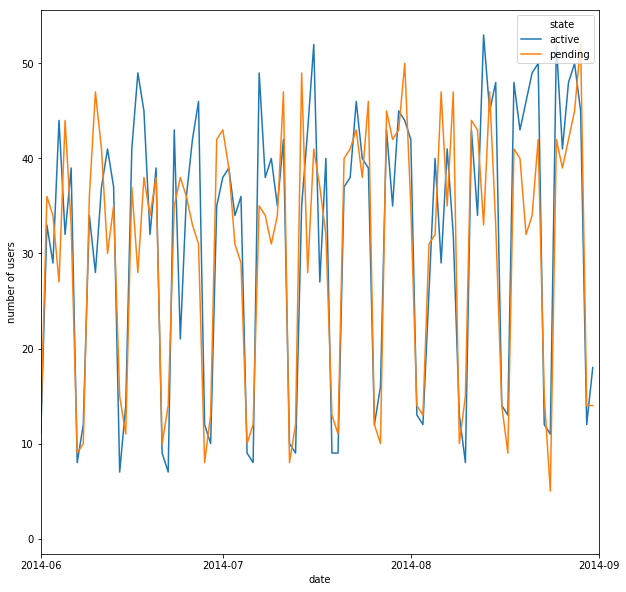

In [26]:
# plot daily new active and pending user numbers
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=users_daily, x='date', y='number of users', hue='state', ax=ax)
ax.set_xlim(pd.Timestamp('2014-06-01'), pd.Timestamp('2014-09-01'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.legend(loc=1)

From this plot, we can see that the registration numbers look healthy in this time period. So the dip may not be caused by failure registration. It is engagement users only.

# Location distribution
In this part, we will check if this decreasement is caused only in some specific regions. At first, I load three weeks data and seperate them to "1 week before", "in this week" and "1 week later", so we can compare the variation of location distribution.

In [27]:
startdate = pd.to_datetime("2014-07-28").date()
enddate = pd.to_datetime("2014-08-04").date()
mask = (events['date'] >= startdate) & (events['date'] < enddate)
events_week1 = events.loc[mask].copy()
events_week1['period'] = '1 week before'
events_week1.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,period
14287,13743.0,2014-07-30 06:10:40,engagement,login,United States,macbook pro,3.0,2014-07-30,1 week before
14288,13743.0,2014-07-30 06:11:09,engagement,view_inbox,United States,macbook pro,3.0,2014-07-30,1 week before
14289,13743.0,2014-07-30 06:11:41,engagement,home_page,United States,macbook pro,3.0,2014-07-30,1 week before
14290,13743.0,2014-07-30 06:12:17,engagement,send_message,United States,macbook pro,3.0,2014-07-30,1 week before
14291,13743.0,2014-07-30 06:12:34,engagement,home_page,United States,macbook pro,3.0,2014-07-30,1 week before


In [28]:
startdate = pd.to_datetime("2014-08-04").date()
enddate = pd.to_datetime("2014-08-11").date()
mask = (events['date'] >= startdate) & (events['date'] < enddate)
events_week2 = events.loc[mask].copy()
events_week2['period'] = 'in this week'

In [29]:
startdate = pd.to_datetime("2014-08-11").date()
enddate = pd.to_datetime("2014-08-18").date()
mask = (events['date'] >= startdate) & (events['date'] < enddate)
events_week3 = events.loc[mask].copy()
events_week3['period'] = '1 week later'

In [30]:
events_check = pd.concat([events_week1,events_week2,events_week3])
events_check.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,period
14287,13743.0,2014-07-30 06:10:40,engagement,login,United States,macbook pro,3.0,2014-07-30,1 week before
14288,13743.0,2014-07-30 06:11:09,engagement,view_inbox,United States,macbook pro,3.0,2014-07-30,1 week before
14289,13743.0,2014-07-30 06:11:41,engagement,home_page,United States,macbook pro,3.0,2014-07-30,1 week before
14290,13743.0,2014-07-30 06:12:17,engagement,send_message,United States,macbook pro,3.0,2014-07-30,1 week before
14291,13743.0,2014-07-30 06:12:34,engagement,home_page,United States,macbook pro,3.0,2014-07-30,1 week before


In [31]:
events_check = events_check.drop_duplicates(subset=['user_id','date'], keep='first')
events_check.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,period
14287,13743.0,2014-07-30 06:10:40,engagement,login,United States,macbook pro,3.0,2014-07-30,1 week before
25949,15352.0,2014-08-01 07:19:51,engagement,login,Brazil,samsung galaxy s4,1.0,2014-08-01,1 week before
26077,15365.0,2014-08-02 13:37:52,engagement,login,United Kingdom,macbook pro,2.0,2014-08-02,1 week before
26451,15424.0,2014-07-31 11:38:28,engagement,login,Germany,lenovo thinkpad,1.0,2014-07-31,1 week before
29209,15788.0,2014-07-30 12:17:18,engagement,login,United States,macbook pro,3.0,2014-07-30,1 week before


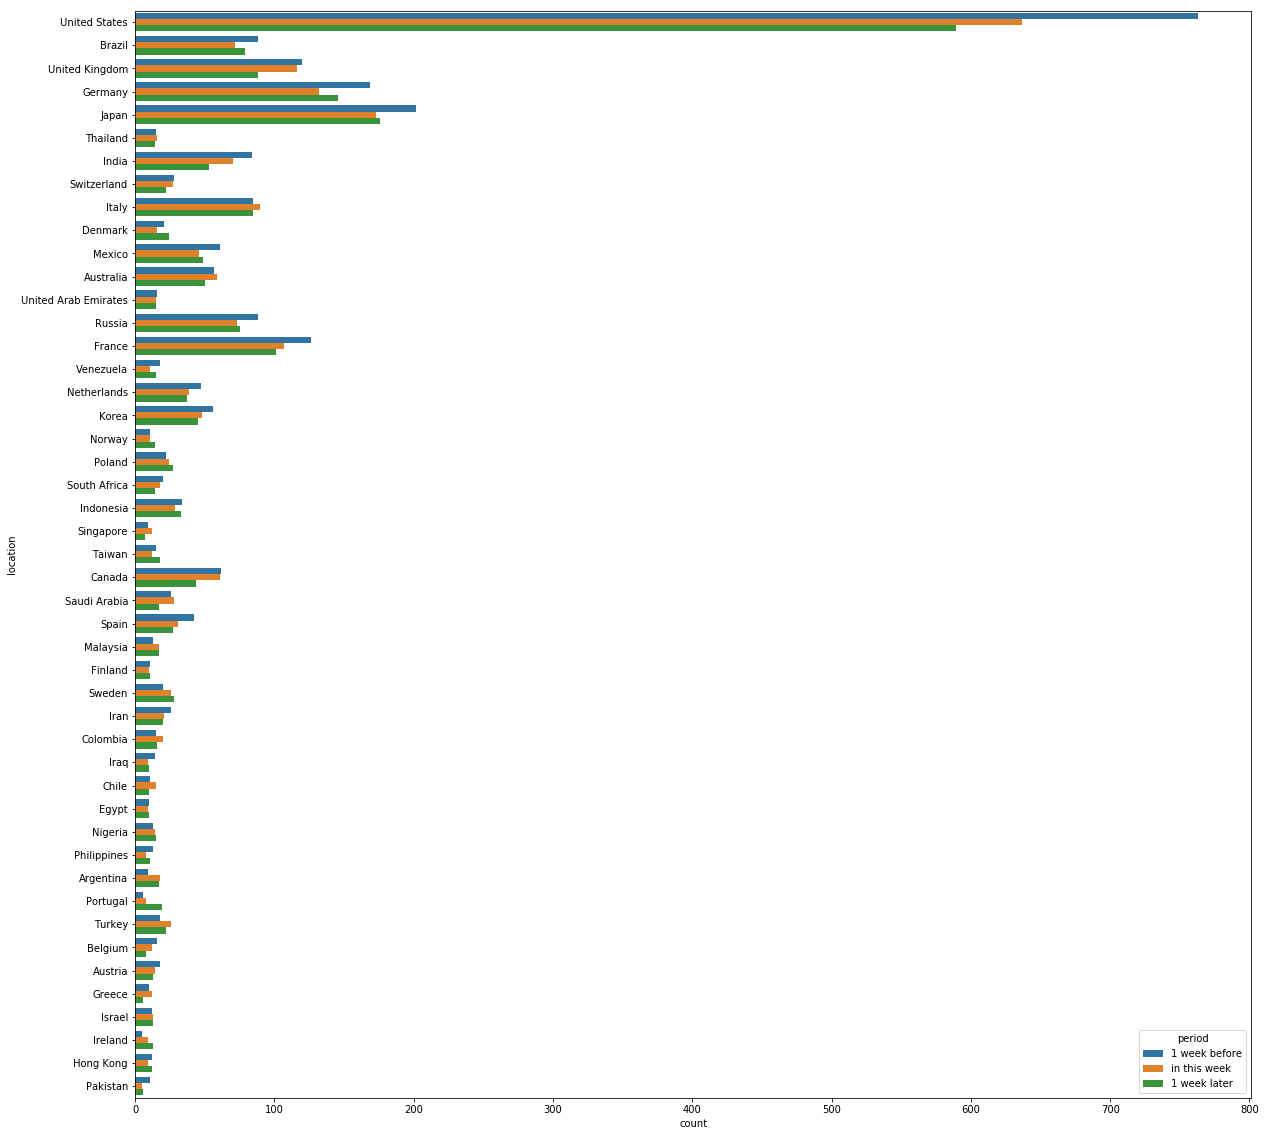

In [33]:
# Plot the counts of observations in each locations using bars.
_, axes = plt.subplots(figsize=(20, 20))
sns.countplot(y = 'location', hue="period", data=events_check, orient='h', ax= axes);

In this bar plot, we can find that the users are mainly from United States, Japan and Germany. And the number of users showed a decreasement in all three countries, which is dominated by users from Unite States. So I think this is not a local phenomenon, and it may not be related with holidays and local service outage.

Here I will show a daily plots for the number of users in the top three countries.

In [34]:
events_daily_location = events[['date','user_id','location']].copy()
events_daily_location.head()

,date,user_id,location
0,2014-05-02,10522.0,Japan
1,2014-05-02,10522.0,Japan
2,2014-05-02,10522.0,Japan
3,2014-05-02,10522.0,Japan
4,2014-05-02,10522.0,Japan


In [35]:
# select the users only in the top 3 countries
events_daily_location = events_daily_location.loc[events_daily_location['location'].isin(['United States','Japan','Germany'])]
events_daily_location.head()

,date,user_id,location
0,2014-05-02,10522.0,Japan
1,2014-05-02,10522.0,Japan
2,2014-05-02,10522.0,Japan
3,2014-05-02,10522.0,Japan
4,2014-05-02,10522.0,Japan


In [36]:
events_daily_location = events_daily_location.groupby(['date','location'])["user_id"].nunique().reset_index(name="number of users")
events_daily_location.head()

,date,location,number of users
0,2014-05-01,Germany,18
1,2014-05-01,Japan,18
2,2014-05-01,United States,96
3,2014-05-02,Germany,31
4,2014-05-02,Japan,27


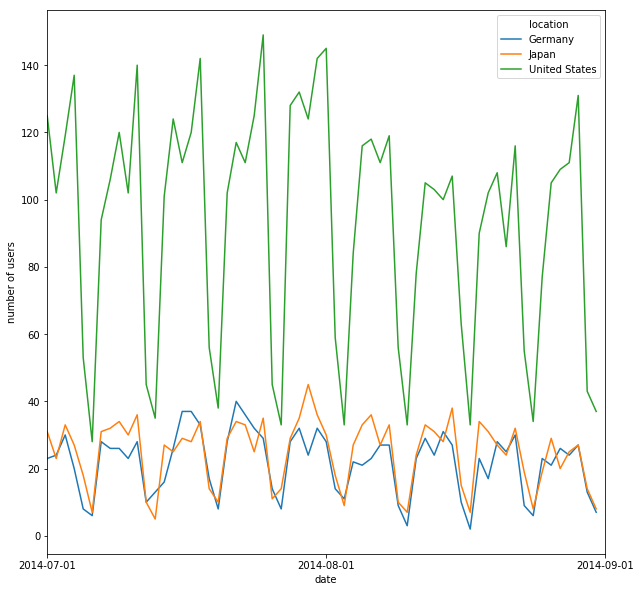

In [37]:
# plot daily engagement user numbers in top 3 countries
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=events_daily_location, x='date', y='number of users', hue='location', ax=ax)
ax.set_xlim(pd.Timestamp('2014-07-01'), pd.Timestamp('2014-09-01'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.legend(loc=1)

Since we already figure out that the decreasement is not caused by locations, let's check if it is a failure related with device platform.

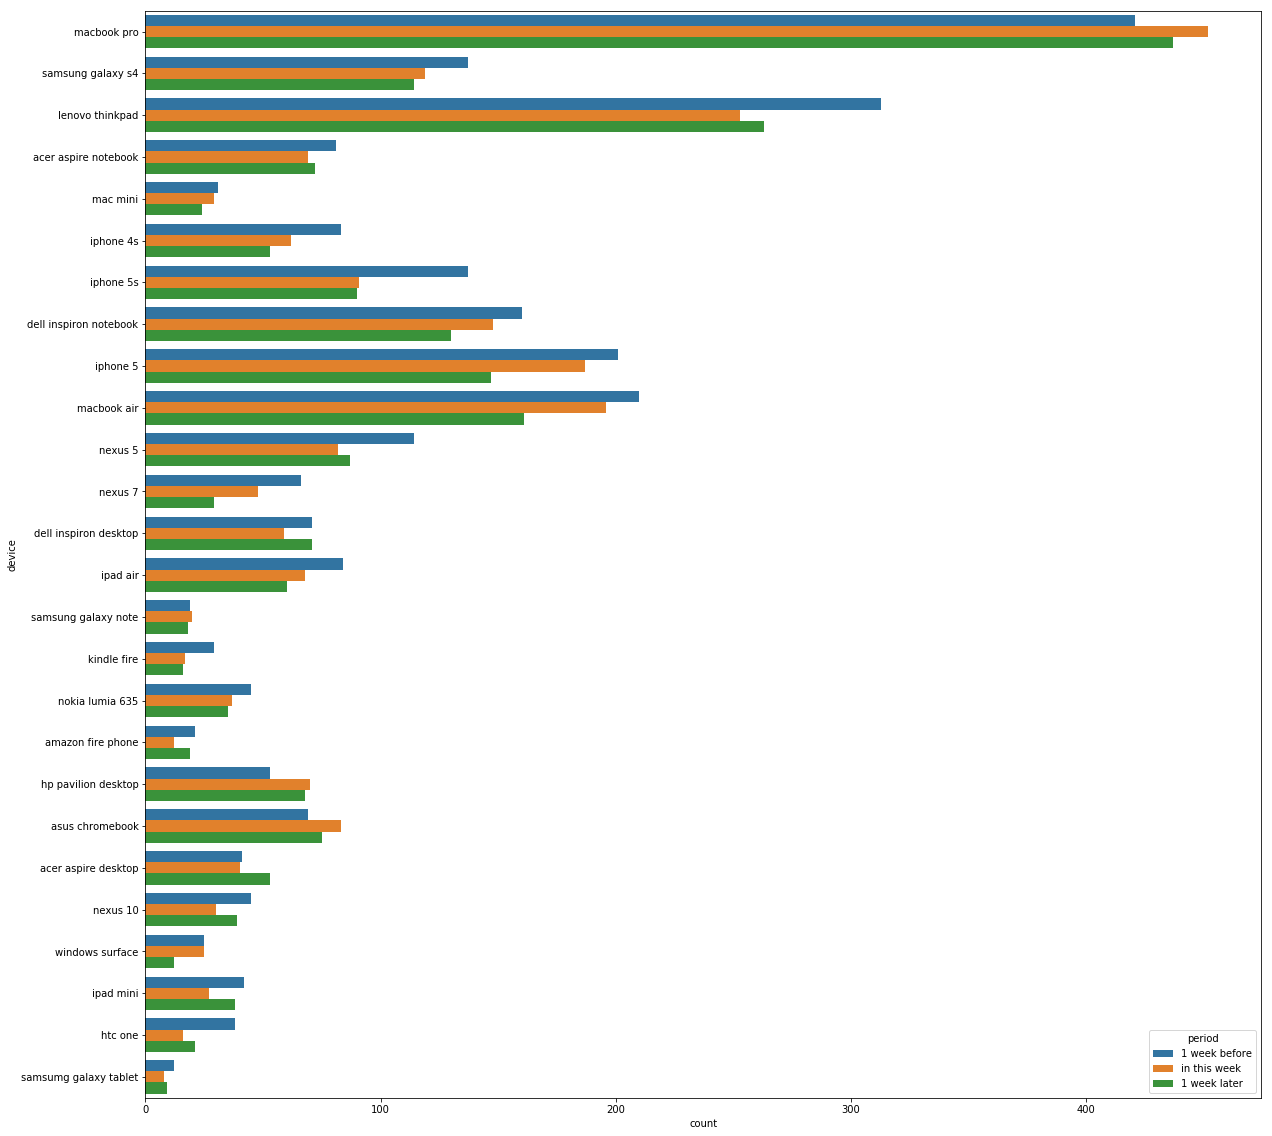

In [39]:
# Plot the counts of observations in each devices using bars
_, axes = plt.subplots(figsize=(20, 20))
sns.countplot(y = 'device', hue="period", data=events_check, orient='h', ax= axes);

There are 26 types of devices! But we can see some obvious variations there. Like Lenovo Thinkpad, iPhone 4s, iPhone 5s showed large drops. Some other mobile devices like phones or tables all showed small drops.
Now let's group them by three categories "computer", "tablet" and "phone" to see if there is anything in common.

In [47]:
events['device'].unique()

array(['dell inspiron notebook', 'iphone 5', 'iphone 4s',
       'windows surface', 'macbook air', 'iphone 5s', 'macbook pro',
       'kindle fire', 'ipad mini', 'nexus 7', 'nexus 5',
       'samsung galaxy s4', 'lenovo thinkpad', 'samsumg galaxy tablet',
       'acer aspire notebook', 'asus chromebook', 'htc one',
       'nokia lumia 635', 'samsung galaxy note', 'acer aspire desktop',
       'mac mini', 'hp pavilion desktop', 'dell inspiron desktop',
       'ipad air', 'amazon fire phone', 'nexus 10'], dtype=object)

In [48]:
# computer
mask = events['device'].isin(['dell inspiron notebook','macbook air','macbook pro','lenovo thinkpad','acer aspire notebook','asus chromebook','acer aspire desktop','mac mini','hp pavilion desktop','dell inspiron desktop'])
events_device1 = events.loc[mask].copy()
events_device1['device_type'] = 'computer'
events_device1.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,device_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,computer
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,computer
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,computer
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,computer
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,computer


In [49]:
# phone
mask = events['device'].isin(['iphone 5','iphone 4s','iphone 5s','nexus 5','samsung galaxy s4','htc one','nokia lumia 635','samsung galaxy note','amazon fire phone'])
events_device2 = events.loc[mask].copy()
events_device2['device_type'] = 'phone'

In [43]:
# tablet
mask = events['device'].isin(['windows surface','kindle fire','ipad mini','nexus 7','samsumg galaxy tablet','ipad air','nexus 10'])
events_device3 = events.loc[mask].copy()
events_device3['device_type'] = 'tablet'

In [44]:
events_device = pd.concat([events_device1,events_device2,events_device3])
events_device.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,device_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,computer
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,computer
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,computer
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,computer
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,computer


In [45]:
events_device_daily = events_device.groupby(['date','device_type'])["user_id"].nunique().reset_index(name="number of users")
events_device_daily.head()

,date,device_type,number of users
0,2014-05-01,computer,189
1,2014-05-01,phone,127
2,2014-05-01,tablet,35
3,2014-05-02,computer,205
4,2014-05-02,phone,136


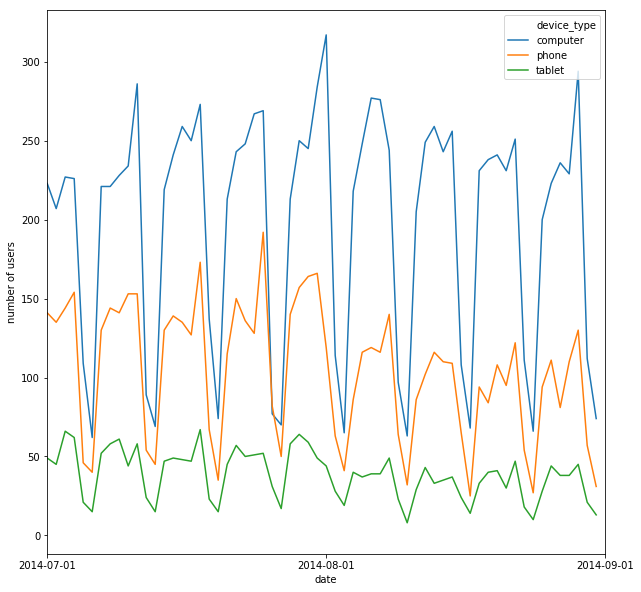

In [46]:
# plot daily engagement user numbers in 3 platforms
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=events_device_daily, x='date', y='number of users', hue='device_type', ax=ax)
ax.set_xlim(pd.Timestamp('2014-07-01'), pd.Timestamp('2014-09-01'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.legend(loc=1)

The decreasement is clearly showed in phone and tablets, and a little bit in computers. So I may say this decreasement is related with device platform.

# Emails (another data source)
Here I have another data source besides the engagement information. And we may be able to get some more information on this decresement which is related with devices.

In [50]:
# load emails table into pandas dataframe
emails = pd.read_csv("./data/yammer_emails.csv")
emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [51]:
emails.dtypes

user_id        float64
occurred_at     object
action          object
user_type      float64
dtype: object

In [52]:
emails['action'].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [53]:
emails['date'] = pd.DatetimeIndex(pd.to_datetime(emails['occurred_at'])).date
emails.head()

,user_id,occurred_at,action,user_type,date
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0,2014-05-06
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0,2014-05-13
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0,2014-05-20
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0,2014-05-27
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0,2014-06-03


In [54]:
emails_daily = emails[['date','user_id','action']].copy()
emails_daily = emails_daily.groupby(['date','action'])["user_id"].nunique().reset_index(name="number of users")
emails_daily.head()

,date,action,number of users
0,2014-05-01,email_clickthrough,61
1,2014-05-01,email_open,145
2,2014-05-01,sent_reengagement_email,7
3,2014-05-01,sent_weekly_digest,467
4,2014-05-02,email_clickthrough,82


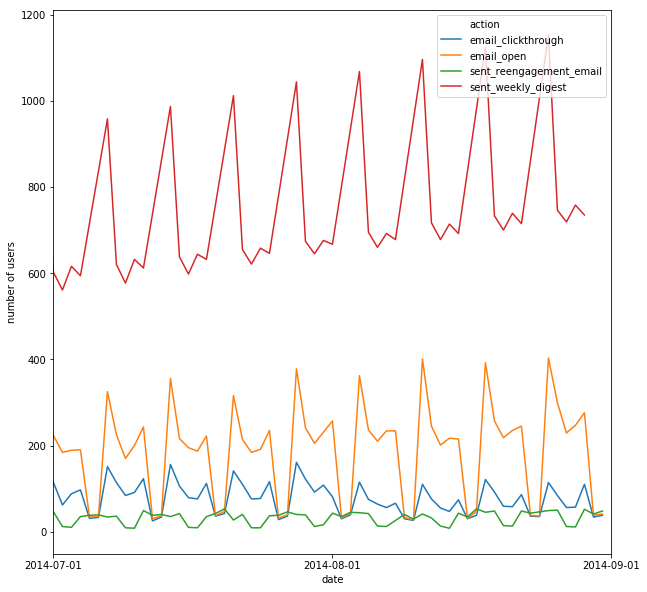

In [55]:
# plot daily user of different email actions
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=emails_daily, x='date', y='number of users', hue='action', ax=ax)
ax.set_xlim(pd.Timestamp('2014-07-01'), pd.Timestamp('2014-09-01'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.legend(loc=1)

From the daily plots we can see that the emails sent and emails opened are showing normal numbers. But the click-through emails showed a decreasement. In the following bar plot of three weeks data, it is more obvious

In [56]:
startdate = pd.to_datetime("2014-07-28").date()
enddate = pd.to_datetime("2014-08-04").date()
mask = (emails['date'] >= startdate) & (emails['date'] < enddate)
emails_week1 = emails.loc[mask].copy()
emails_week1['class'] = 1.0
emails_week1.head()

,user_id,occurred_at,action,user_type,date,class
15,0.0,2014-07-29 09:30:00,sent_weekly_digest,1.0,2014-07-29,1.0
16,0.0,2014-07-29 09:30:35,email_open,1.0,2014-07-29,1.0
42,4.0,2014-07-29 09:30:00,sent_weekly_digest,3.0,2014-07-29,1.0
62,8.0,2014-07-29 09:30:00,sent_weekly_digest,3.0,2014-07-29,1.0
63,8.0,2014-07-29 09:30:27,email_open,3.0,2014-07-29,1.0


In [57]:
startdate = pd.to_datetime("2014-08-04").date()
enddate = pd.to_datetime("2014-08-11").date()
mask = (emails['date'] >= startdate) & (emails['date'] < enddate)
emails_week2 = emails.loc[mask].copy()
emails_week2['class'] = 2.0

In [58]:
startdate = pd.to_datetime("2014-08-11").date()
enddate = pd.to_datetime("2014-08-18").date()
mask = (emails['date'] >= startdate) & (emails['date'] < enddate)
emails_week3 = emails.loc[mask].copy()
emails_week3['class'] = 3.0

In [59]:
emails_check = pd.concat([emails_week1,emails_week2,emails_week3])
emails_check.head()

,user_id,occurred_at,action,user_type,date,class
15,0.0,2014-07-29 09:30:00,sent_weekly_digest,1.0,2014-07-29,1.0
16,0.0,2014-07-29 09:30:35,email_open,1.0,2014-07-29,1.0
42,4.0,2014-07-29 09:30:00,sent_weekly_digest,3.0,2014-07-29,1.0
62,8.0,2014-07-29 09:30:00,sent_weekly_digest,3.0,2014-07-29,1.0
63,8.0,2014-07-29 09:30:27,email_open,3.0,2014-07-29,1.0


In [60]:
emails_check = emails_check.drop_duplicates(subset=['user_id','action','date'], keep='first')
emails_check.head()

,user_id,occurred_at,action,user_type,date,class
15,0.0,2014-07-29 09:30:00,sent_weekly_digest,1.0,2014-07-29,1.0
16,0.0,2014-07-29 09:30:35,email_open,1.0,2014-07-29,1.0
42,4.0,2014-07-29 09:30:00,sent_weekly_digest,3.0,2014-07-29,1.0
62,8.0,2014-07-29 09:30:00,sent_weekly_digest,3.0,2014-07-29,1.0
63,8.0,2014-07-29 09:30:27,email_open,3.0,2014-07-29,1.0


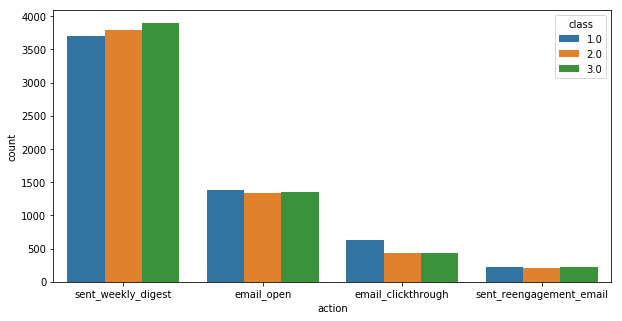

In [61]:
# Plot the counts of actions related with emails using bars
_, axes = plt.subplots(figsize=(10, 5))
sns.countplot(x = 'action', hue="class", data=emails_check, orient='v', ax= axes);

So you can see that the same level of emails sent to the users, same level of emails are opened, but decresement on the number of emails are clicked. This may be the reason why Yammer lost some users in the week, because the email didn't lead them to the product like before.

# Recommendations
Check the emails showed on the different device platforms, like iPhonee 4s, iPhone 5 or Lenovo Thinkpad. Thinking about the reason why users don't click the email